# 💡 Why Do Customers Leave?
### Exploring Churn Through Tenure & Pricing

This project analyzes customer behavior data to understand patterns associated
with customer churn in a telecommunications service. Using exploratory data
analysis and a simple predictive model, the goal is to identify early indicators
of customer attrition and highlight factors that may influence retention.

The analysis focuses on customer tenure and monthly charges to explore how
usage duration and pricing relate to churn behavior.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(
    style="darkgrid",
    palette="pastel",
    rc={
        "figure.facecolor": "#1e1e2e",
        "axes.facecolor": "#1e1e2e",
        "axes.edgecolor": "white",
        "text.color": "white",
        "axes.labelcolor": "white",
        "xtick.color": "white",
        "ytick.color": "white",
        "grid.color": "#44475a"
    }
)

custom_palette = ["#ff79c6", "#8be9fd"]

In [2]:
df = pd.read_csv("/Telco-Customer-Churn.csv")

## 📊 Getting to Know the Data

This dataset contains customer-level information from a telecommunications
service, where each row represents an individual customer. The target variable,
**Churn**, indicates whether a customer has left the service, while other
features capture demographics, service usage, and billing characteristics.

*Data source:* Publicly available Telco Customer Churn dataset.

---

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## 🧼 Cleaning Things Up

Before analysis, basic preprocessing was performed to prepare the data
for exploration and modeling.

---

In [5]:
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})

## 📈 Exploring Customer Behavior

We explore how customer tenure and monthly charges relate to churn behavior.

---

### ⏳ How Long Do Customers Stick Around?

Customer tenure represents how long a customer has remained with the service.
Understanding this relationship helps identify **early churn risk**.

Do customers with shorter tenure churn more often?


In [6]:
df.groupby("Churn")["tenure"].mean()

,tenure
Churn,
0,37.569965
1,17.979133


/tmp/ipython-input-1294846376.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


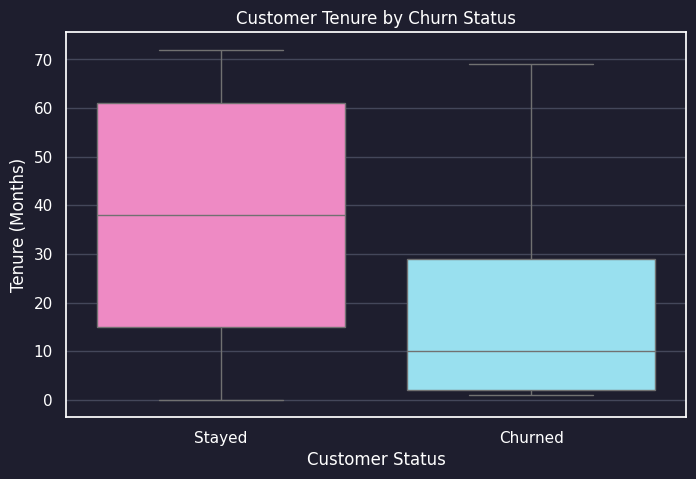

In [7]:
plt.figure(figsize=(8, 5))

sns.boxplot(
    x="Churn",
    y="tenure",
    data=df,
    palette=custom_palette,
    showfliers=False
)

plt.xticks([0, 1], ["Stayed", "Churned"])
plt.xlabel("Customer Status")
plt.ylabel("Tenure (Months)")
plt.title("Customer Tenure by Churn Status")

plt.show()

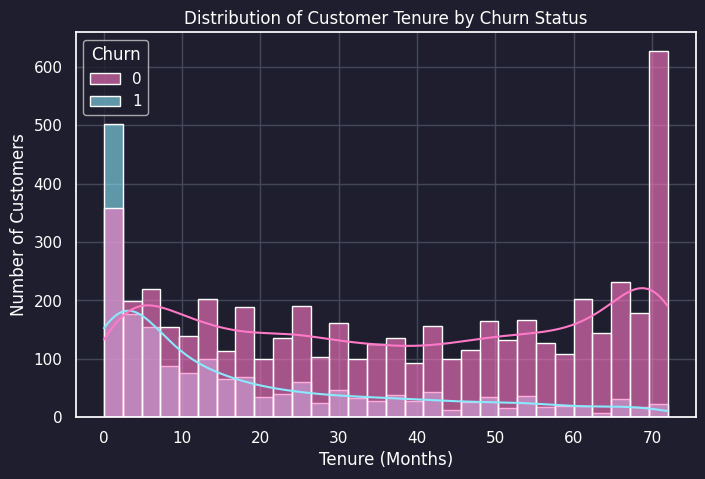

In [8]:
plt.figure(figsize=(8, 5))

sns.histplot(
    data=df,
    x="tenure",
    hue="Churn",
    bins=30,
    kde=True,
    palette=custom_palette,
    alpha=0.6
)

plt.xlabel("Tenure (Months)")
plt.ylabel("Number of Customers")
plt.title("Distribution of Customer Tenure by Churn Status")

plt.show()

**Insight:**  
Customers who churn tend to leave much earlier than customers who stay,
suggesting that churn risk is highest during the early customer lifecycle.

---

### 💸 Does Price Play a Role?

Monthly charges reflect the cost of service to the customer.
Higher prices may influence churn if customers perceive lower value.

Are higher monthly charges associated with increased churn?

In [9]:
df.groupby("Churn")["MonthlyCharges"].mean()

,MonthlyCharges
Churn,
0,61.265124
1,74.441332


/tmp/ipython-input-3842001127.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


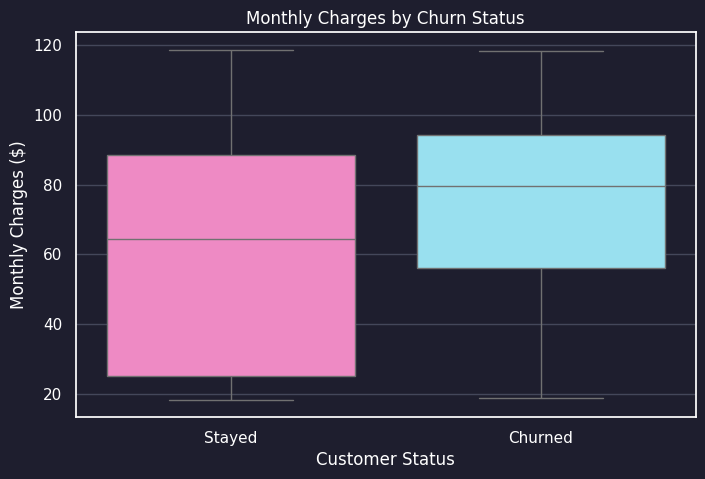

In [10]:
plt.figure(figsize=(8, 5))

sns.boxplot(
    x="Churn",
    y="MonthlyCharges",
    data=df,
    palette=custom_palette,
    showfliers=False
)

plt.xticks([0, 1], ["Stayed", "Churned"])
plt.xlabel("Customer Status")
plt.ylabel("Monthly Charges ($)")
plt.title("Monthly Charges by Churn Status")

plt.show()

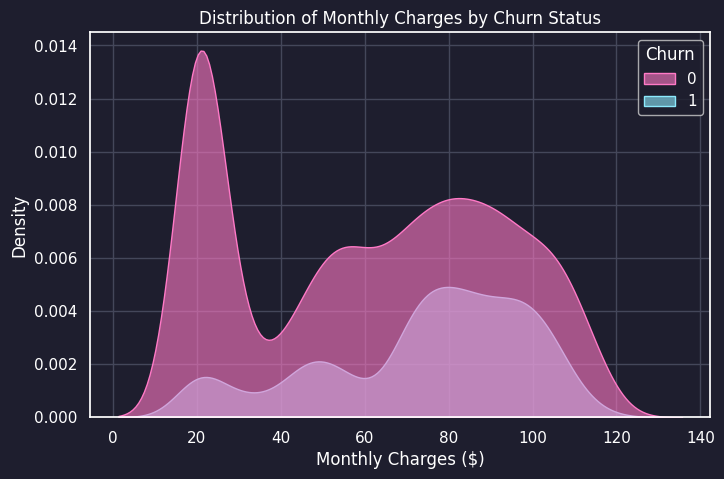

In [11]:
plt.figure(figsize=(8, 5))

sns.kdeplot(
    data=df,
    x="MonthlyCharges",
    hue="Churn",
    fill=True,
    palette=custom_palette,
    alpha=0.6
)

plt.xlabel("Monthly Charges ($)")
plt.ylabel("Density")
plt.title("Distribution of Monthly Charges by Churn Status")

plt.show()

**Insight:**  
Customers who churn generally have higher monthly charges, indicating that
pricing sensitivity may contribute to customer attrition.

---

## 🧩 Putting the Pieces Together

Customers with both **shorter tenure** and **higher monthly charges**
appear to be at greater risk of churn. This suggests that early-stage
customers on higher-cost plans may benefit most from targeted onboarding,
pricing adjustments, or retention incentives.

---

## 🤖 Can We Predict Churn?

To explore whether these patterns can be translated into a predictive
framework, a simple logistic regression model was trained using tenure
and monthly charges.

---

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

X = df[["tenure", "MonthlyCharges"]]
y = df["Churn"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [13]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [14]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.66      0.48      0.56       373

    accuracy                           0.80      1409
   macro avg       0.75      0.70      0.71      1409
weighted avg       0.79      0.80      0.79      1409



**Model Interpretation:**  
While the model is intentionally simple, tenure and pricing features
carry meaningful predictive signal for churn. This demonstrates how
exploratory insights can be translated into a basic predictive approach.

---

## 🎯 What I Learned

- Customers are most likely to churn early in their lifecycle  
- Higher monthly charges are associated with increased churn risk  
- Early retention and pricing strategies may reduce long-term churn  

This project highlights how exploratory analysis and simple modeling
can inform data-driven retention decisions.
